# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [2]:
library('tidyverse')
library(scales)
library('ggrepel')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [3]:
vaccine = read.csv('measles.csv')
vaccine |> head()


,index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [4]:
vaccine |>
    filter(mmr >=0) |>
    group_by(state) |>
    mutate(df_vacc_rates= (sum(mmr >=95, na.rm=TRUE)/n())*100) |>
    select(state, df_vacc_rates) |>
    summarize(df_vacc_rates=min(df_vacc_rates)) 
    
    

state,df_vacc_rates
<chr>,<dbl>
Arizona,50.6404782
Arkansas,0.3527337
California,88.8506151
Colorado,62.3092236
Connecticut,81.1544992
Illinois,89.6825397
Maine,47.3389356
Massachusetts,86.5828092
Minnesota,47.3948525


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [7]:
vaccine |>
    filter(mmr >=0) |>
    group_by(state) |>
    mutate(df_vacc_rates= (sum(mmr >=95, na.rm=TRUE)/n())*100)|>
    select(state, df_vacc_rates) |>
    summarize(df_vacc_rates=min(df_vacc_rates)) |>
    arrange(df_vacc_rates) |>
     head(1)

state,df_vacc_rates
<chr>,<dbl>
Arkansas,0.3527337


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `mutate`, and `cume_dist`.

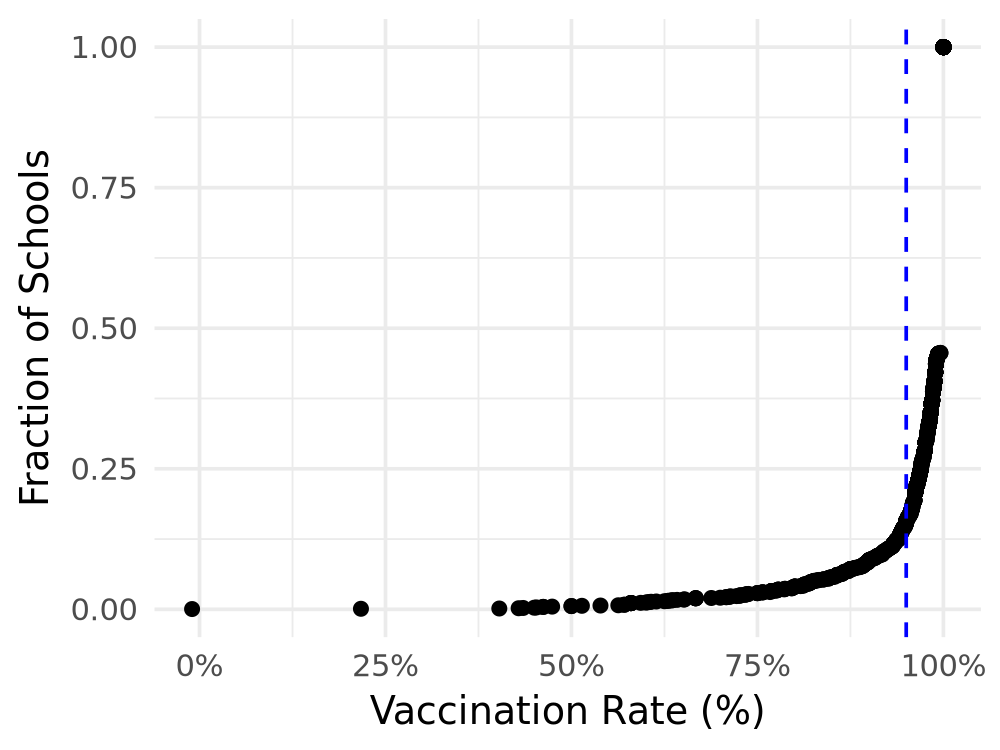

In [8]:

ecdf = vaccine %>%
    filter(state=="North Carolina") %>%
    mutate(cumulative_dist = cume_dist(overall)) %>%
    ggplot(aes(x=overall, y=cumulative_dist)) +
    geom_point()  + labs(x= "Vaccination Rate (%)", y= "Fraction of Schools") + 
    scale_x_continuous(labels=scales::percent_format(scale=1)) 

ecdf= ecdf + geom_vline(aes(xintercept = 95), color = 'blue', linetype=2) + theme_minimal() 

ecdf


(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it. I used `geom_text_repel` from [ggrepel](https://cran.r-project.org/web/packages/ggrepel/vignettes/ggrepel.html) fo the annotation.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/2023/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [10]:
vaccine |>
    filter(state=="North Carolina") |>
    group_by(state) |>
    mutate(df_vacc_rates= (sum(overall >=95, na.rm=TRUE)/n())*100)|>
    summarize(median_vac_rate=median(df_vacc_rates), gr_CDC_rate=median_vac_rate>95)


state,median_vac_rate,gr_CDC_rate
<chr>,<dbl>,<lgl>
North Carolina,84.94005,FALSE
